**<h1>Prediction of Default of Credit Card**


**Content**

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit


SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

**<h2> Importing the Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**<h2> Uploading Dataset**


In [2]:
df=pd.read_excel('TaiwanCreditDefaults.xls',header=1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

**<h2> Exploratory Data Analysis**

We will now undergo data analysis on our model. 

**<h4> CountPlot: defaultpaymentnextmonth**

The below code is implementation of countplot on the column of default payment next month.

<AxesSubplot:ylabel='count'>

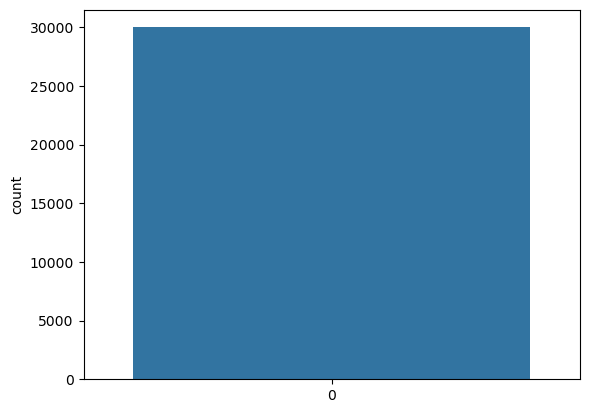

In [9]:
sns.countplot(df['default payment next month'])

**<h4> CountPlot: Sex**

The below code is implementation of countplot on the column of sex.
Here 1 stands for male and 2 for female.

<AxesSubplot:ylabel='count'>

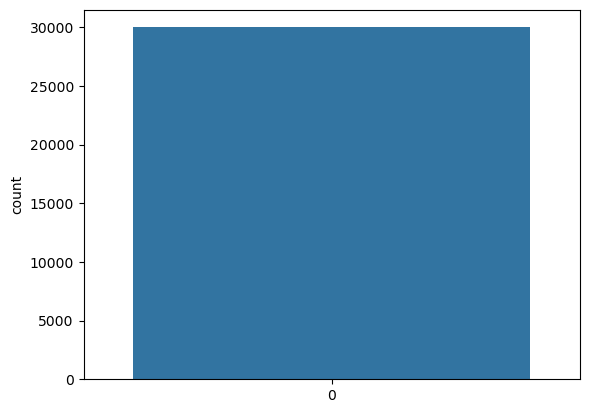

In [10]:
sns.countplot(df['SEX'])

**<h4> CountPlot: defaultpaymentnextmonth alongwith sex**

The below code is implementation of countplot on the column of default payment next month alongwith sex.

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

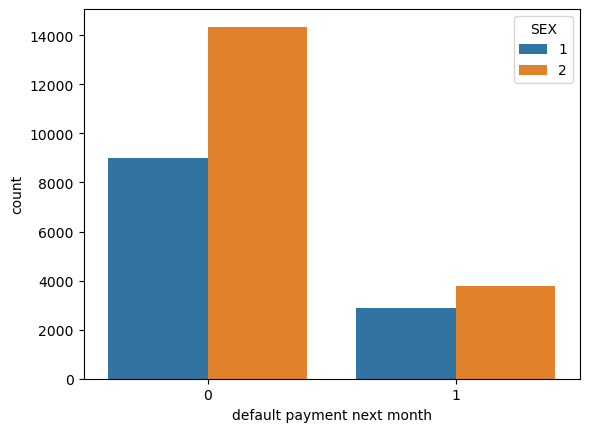

In [11]:
sns.countplot(x=df['default payment next month'],hue=df['SEX'])

**<h4> CountPlot: defaultpaymentnextmonth alongwith Number of Marriages**

The below code is implementation of countplot on the column of default payment next month alongwith number of marriages.

<AxesSubplot:xlabel='default payment next month', ylabel='count'>

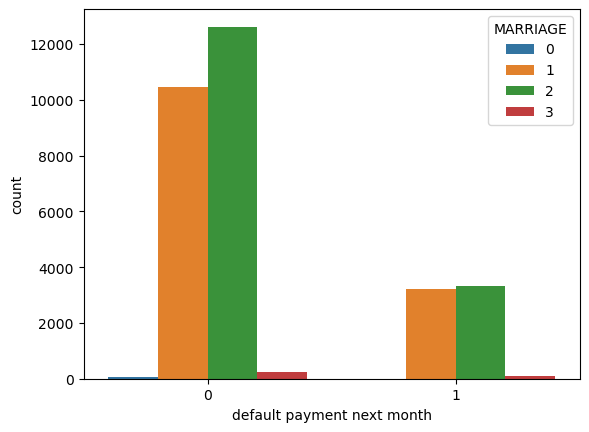

In [12]:
sns.countplot(x=df['default payment next month'],hue=df['MARRIAGE'])

In this case , we will be plotting the barplot between AGE and LIMIT_BAL, to study their relation.

<AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>

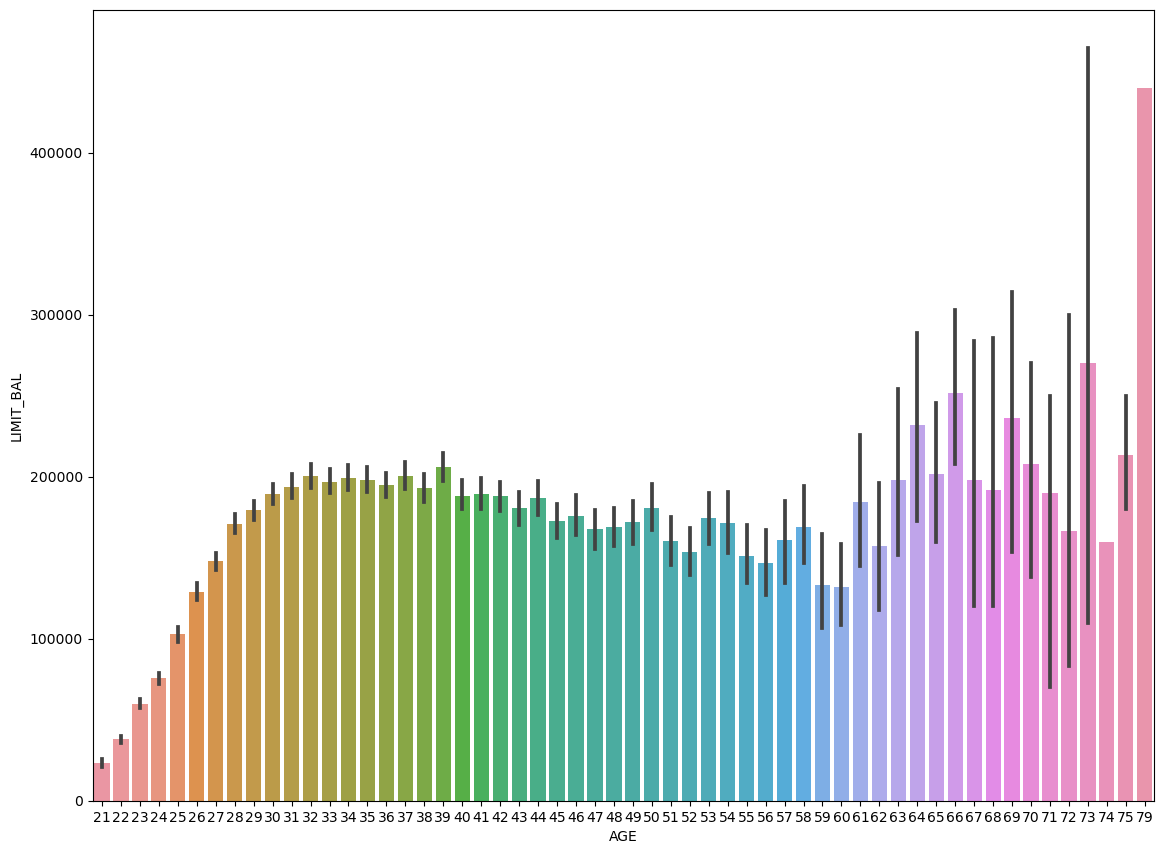

In [13]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(13.7, 10.27)
sns.barplot(x=df['AGE'],y=df['LIMIT_BAL'])

**<h3> Distribution Plot**



<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

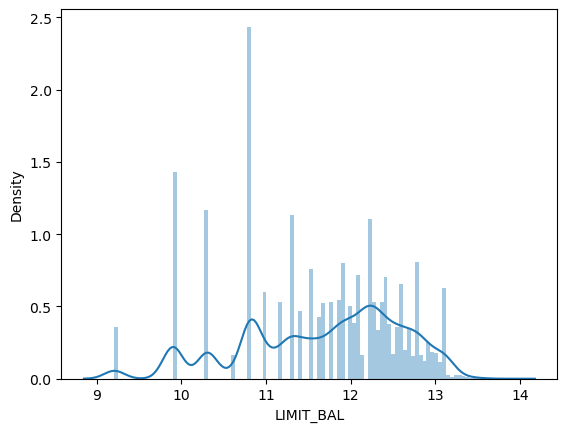

In [14]:
sns.distplot(np.log(df['LIMIT_BAL']),bins=100)

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

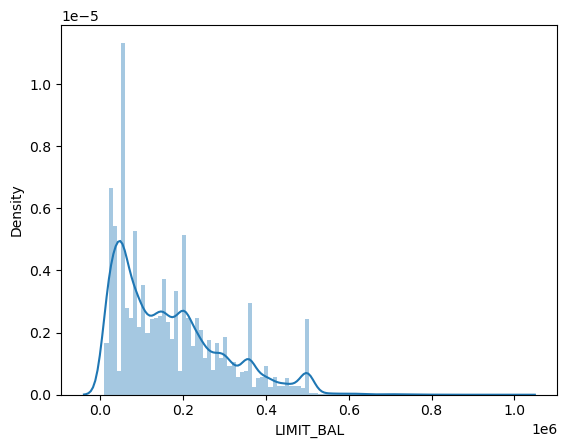

In [15]:
sns.distplot(df['LIMIT_BAL'],bins=100)

<AxesSubplot:>

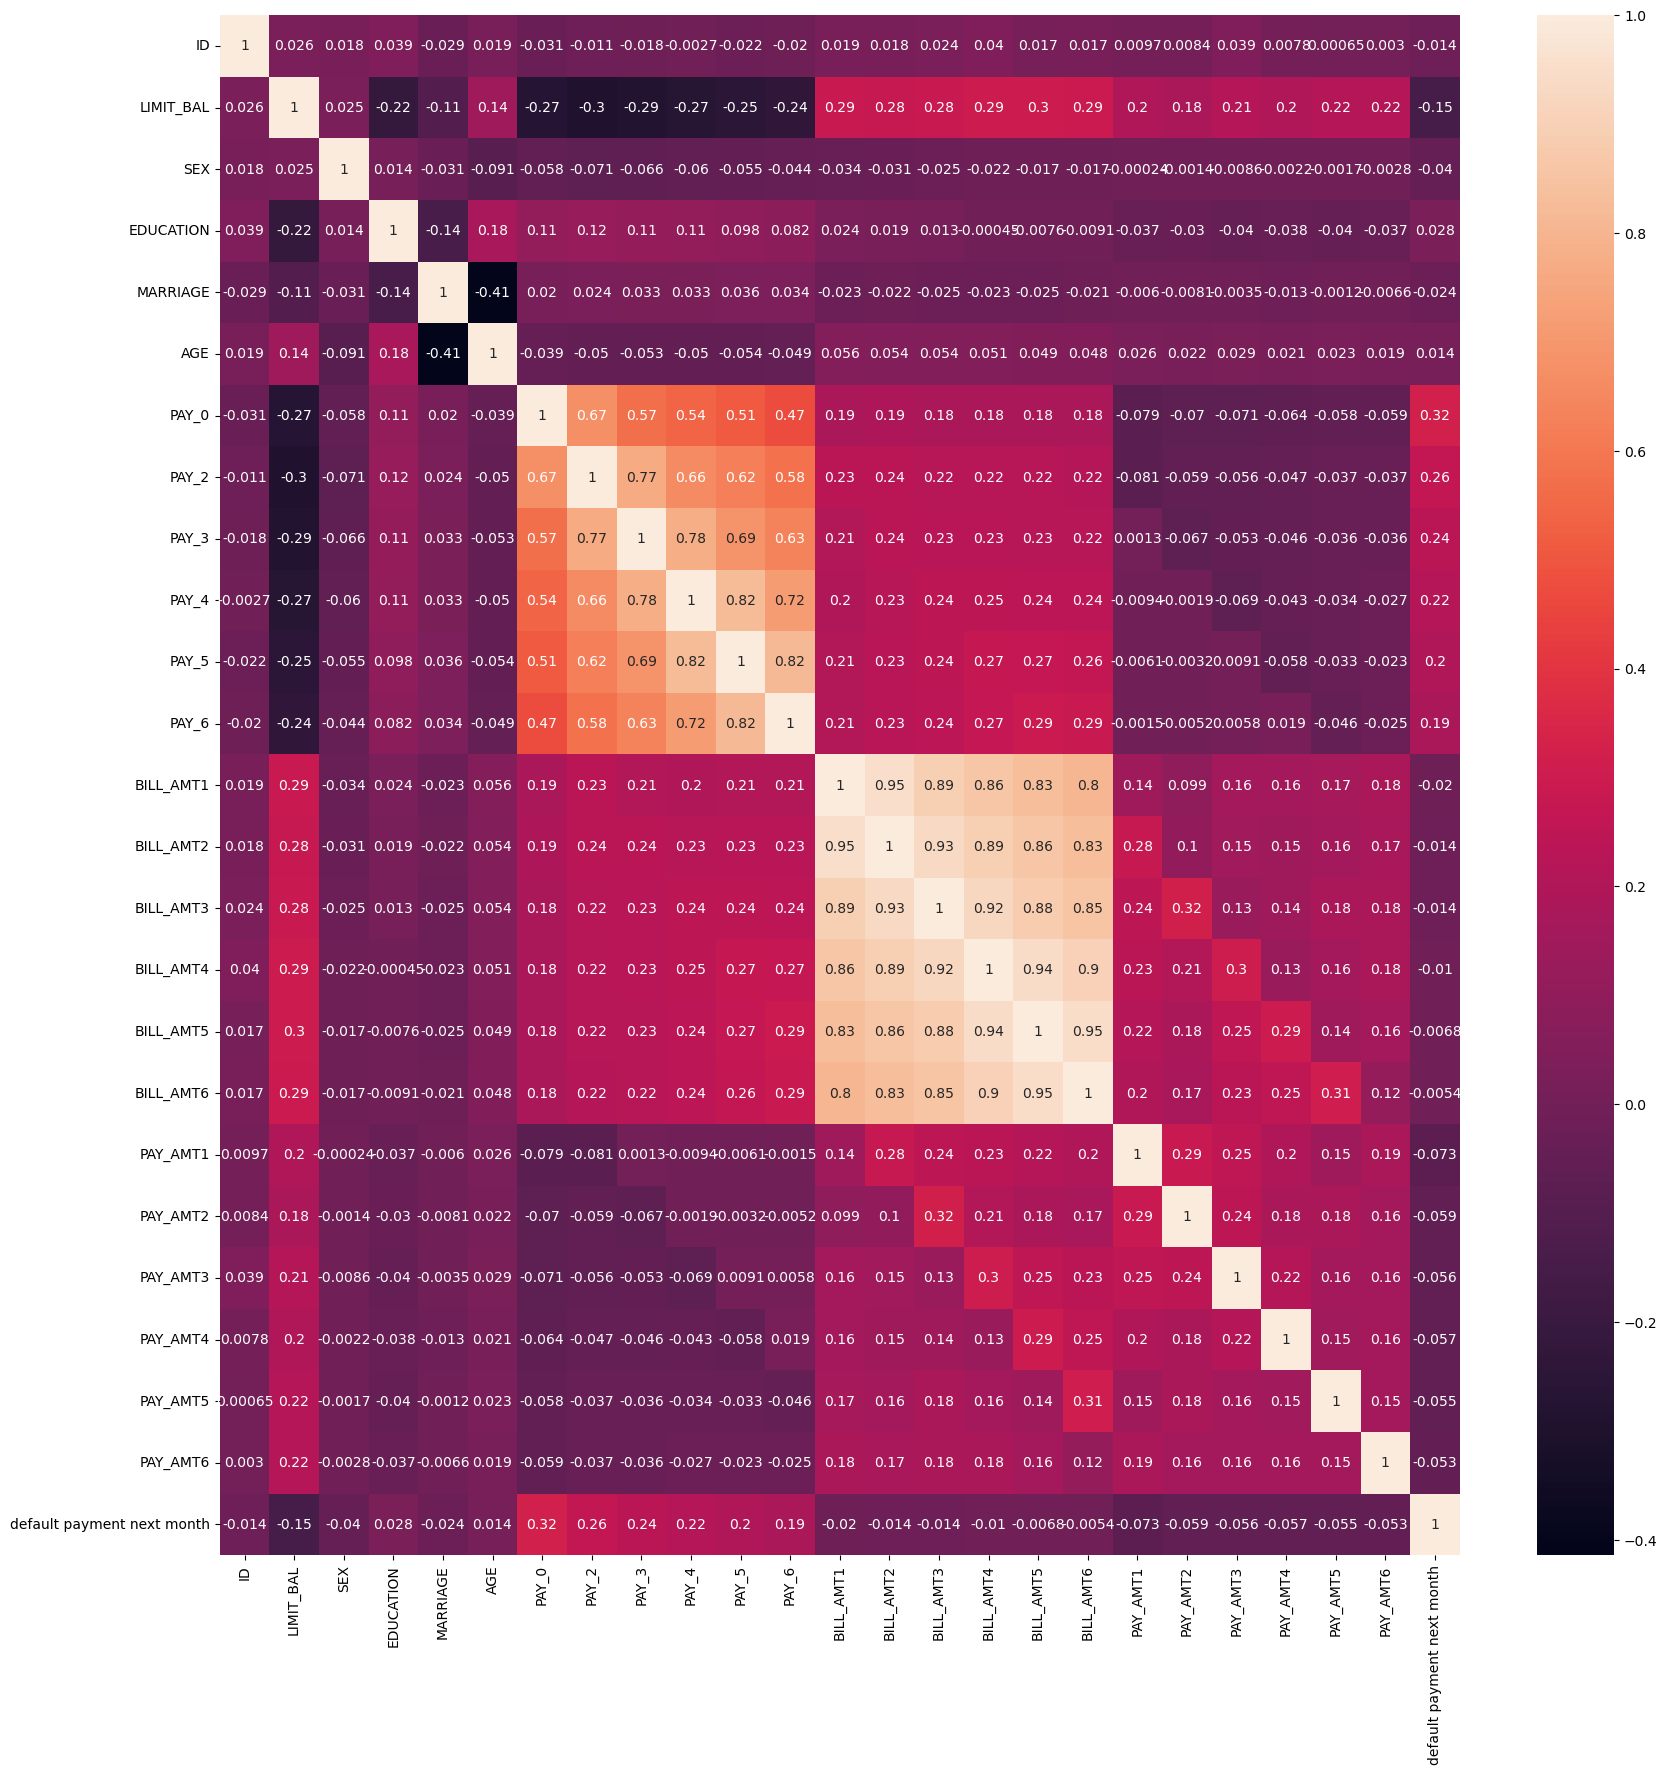

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [17]:
X=df.drop('default payment next month',axis=1)
Y=df['default payment next month']

<AxesSubplot:title={'center':'Correalation with response variable'}>

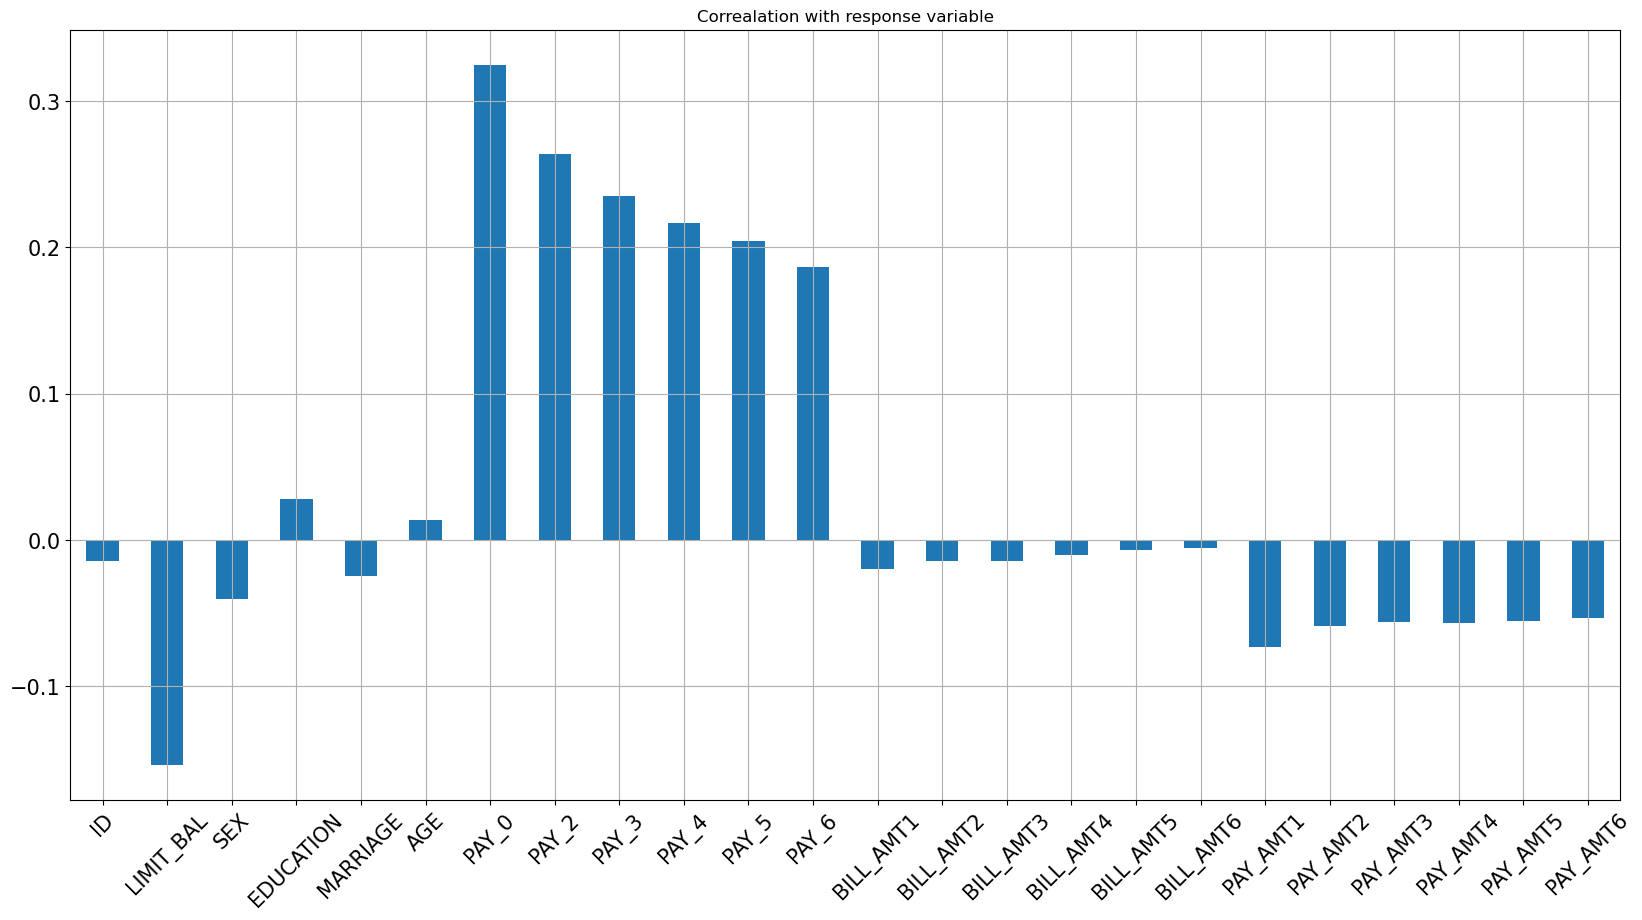

In [18]:
X.corrwith(Y).plot.bar(figsize=(20,10),
                                           title="Correalation with response variable",
                                           fontsize=15,rot=45,grid=True)

**<h2> Exploratory Data Analysis Conclusion**

In [19]:
X_new=X.drop(['ID','MARRIAGE','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5'],axis=1)

In [20]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X_new=sc.fit_transform(X_new)

In [21]:
Y=np.array(Y)

In [22]:
X.shape,Y.shape

((30000, 24), (30000,))

In [23]:
x=X[:1000,]
y=Y[:1000,]

**Splitting Data**


In [24]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y, test_size= 0.2)

**<h2> Implementing Model**


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score

**<h3>Decision Tree**

In [26]:
#parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree=DecisionTreeClassifier()
#clf=GridSearchCV(clf_tree,parameters)
clf_tree.fit(x_train,y_train)
y_pred=clf_tree.predict(x_test)

Next,we'll be predicting the y values.

**<h3> Confusion Matrix**


<AxesSubplot:>

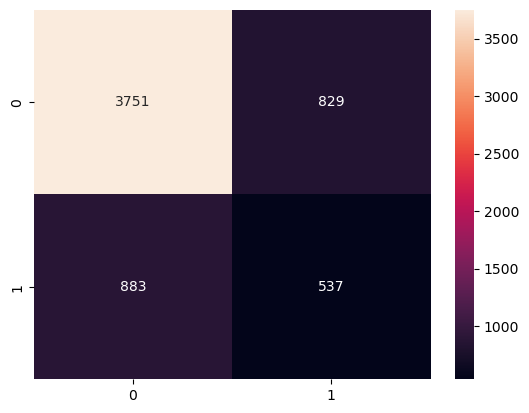

In [27]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')

In [28]:
ac=accuracy_score(y_pred,y_test)
ac

0.7146666666666667

**<h3> Decision Tree with Grid Search**

In [29]:
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

<AxesSubplot:>

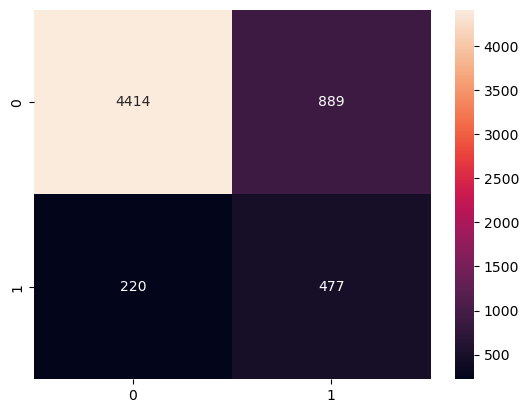

In [30]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='d')

In [31]:
ac=accuracy_score(y_pred,y_test)
ac

0.8151666666666667

 **<h3>Random Forest**

In [32]:
alg1=RandomForestClassifier()
alg1.fit(x_train,y_train)
y_pred1=alg1.predict(x_test)

<AxesSubplot:>

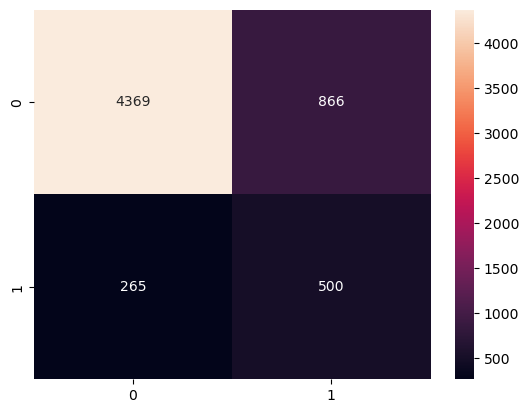

In [33]:
cm=confusion_matrix(y_pred1,y_test)
sns.heatmap(cm,annot=True,fmt='d')

In [34]:
ac=accuracy_score(y_pred1,y_test)
ac

0.8115

**<h2>Default of Credit Card Conclusion**

From our EDA , we could figure out that the following factors contribute the most to a default payment not being made are the limited balance given as credit ,sex,education, the repayment status and the amount of repayment.

We also saw some interesting qualities in data. 
From the countplots it could be seen the female members of the society were more susceptible to not making the default payment.

We also observed Married people to be susceptible to not paying the default.

Credit Assignment was rather random after the age of 60. Prior to this the credit assignment seems to follow an increasing trend until the age of 39 where it seems to reach the local maxima and follows a descent. After 60, it becomes rather random. This is why age, was not chosen as a deciding factor.

After EDA, we used Machine Learning Model to fit on data and make our predictions.

It can be clearly seen that the  Decision Tree model works best because it has got 81.5% accuracy.

This model is ready to be used by Credit Card companies for predicting whether the default payment will be made or not.
